In [2]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.


C:\Users\janan\AppData\Local\Temp\ipykernel_12412\2073240478.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_month_sales = pd.read_sql(query, conn)


Monthly Sales Revenue:
      Month  TotalSales
0   2023-03   695769.31
1   2023-01   681312.97
2   2023-09   680560.23
3   2023-08   657718.33
4   2023-07   657228.26
5   2023-12   652918.26
6   2023-10   651070.24
7   2023-11   645843.08
8   2023-04   633598.27
9   2023-02   617332.99
10  2023-06   562100.01
11  2023-05   547231.61


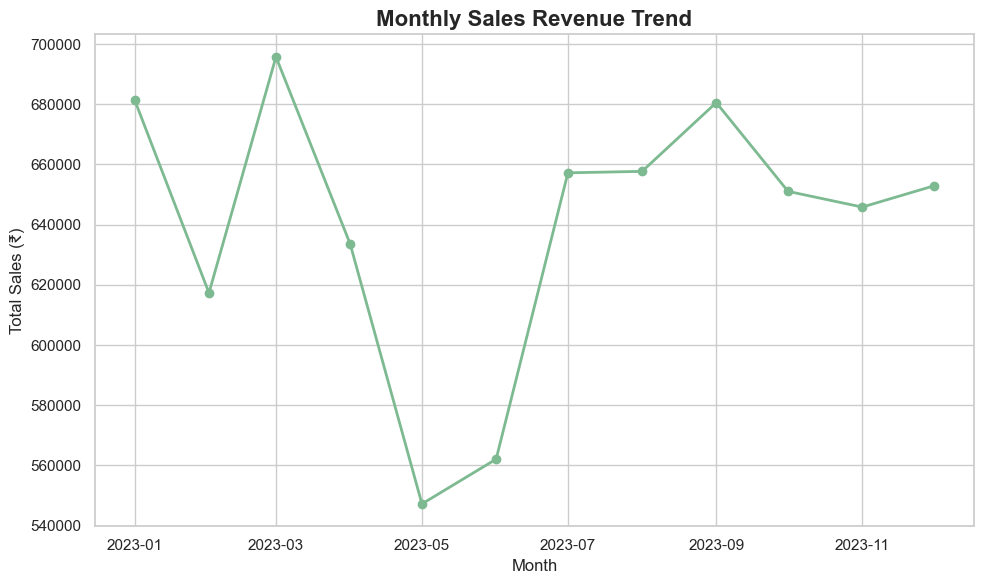

C:\Users\janan\AppData\Local\Temp\ipykernel_12412\2073240478.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_month_sales.sort_values('TotalSales', ascending=False),


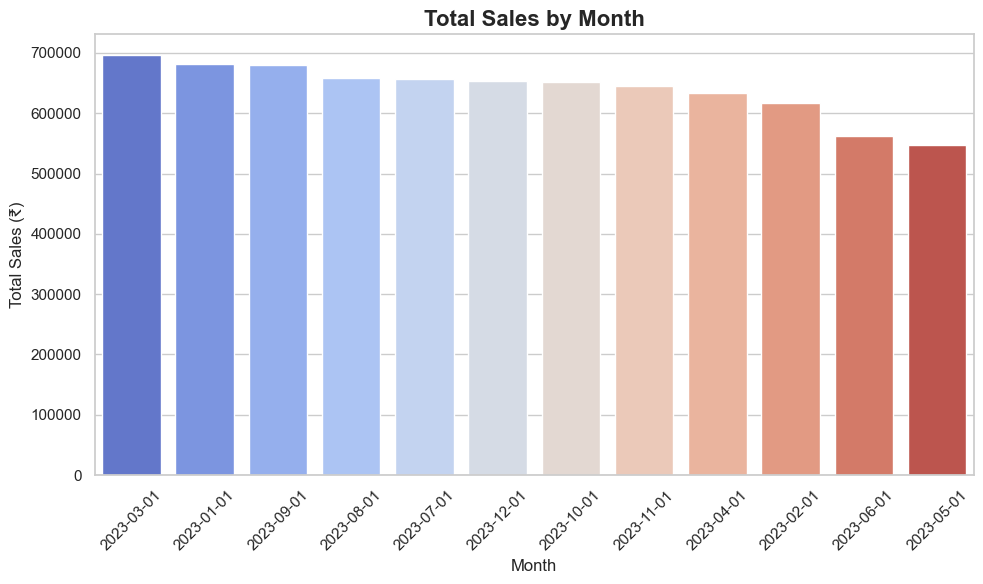

In [3]:
# 1.Which month had the highest sales revenue?
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         # e.g., '127.0.0.1'
    user='root',              # your MySQL username
    password='Janani@1997', # your MySQL password
    database='DB'   # your database name
)

# ---  Call Stored Procedure ---
query = "CALL GetTotalSalesByMonth();"
df_month_sales = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Monthly Sales Revenue:")
print(df_month_sales)

# ---  Convert Month to datetime & sort chronologically ---
df_month_sales['Month'] = pd.to_datetime(df_month_sales['Month'])
df_month_sales = df_month_sales.sort_values('Month')

# ---  Visualization 1: Line Chart (Sales Trend Over Time) ---
sns.set(style="whitegrid", palette="crest")

plt.figure(figsize=(10,6))
plt.plot(df_month_sales['Month'], df_month_sales['TotalSales'], marker='o', linewidth=2)
plt.title("Monthly Sales Revenue Trend", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (₹)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Bar Chart (Highest Sales Months) ---
plt.figure(figsize=(10,6))
sns.barplot(data=df_month_sales.sort_values('TotalSales', ascending=False),
            x='Month', y='TotalSales', palette='coolwarm')
plt.title("Total Sales by Month", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Close the Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_12412\1649334260.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category_sales = pd.read_sql(query, conn)


Total Revenue by Product Category:
  Product_Category  TotalRevenue
0          Apparel    1669523.24
1      Electronics    1594347.87
2           Sports    1508419.32
3       Home Decor    1469350.09
4           Beauty    1441043.04


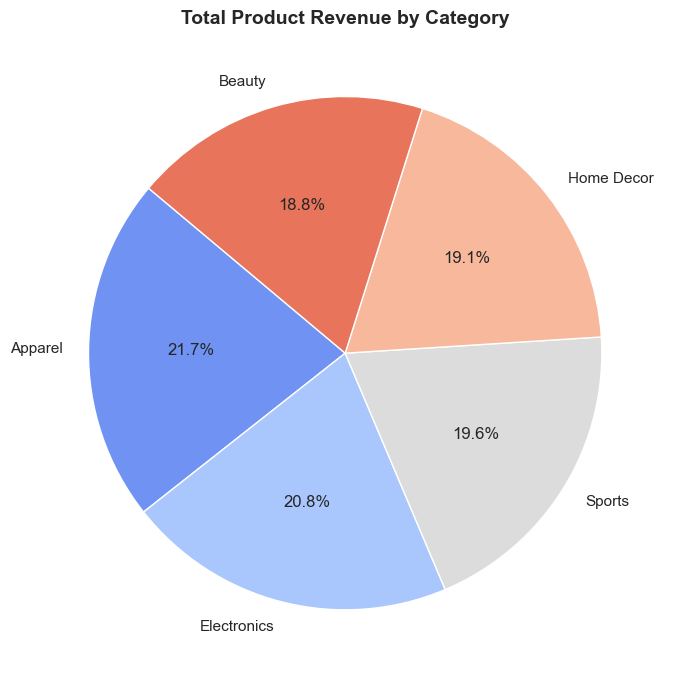

In [7]:
#2. Which product category contributes most to total revenue?
# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         # e.g., '127.0.0.1'
    user='root',              # your MySQL username
    password='Janani@1997', # your MySQL password
    database='DB'   # your database name
)

# ---  Call Stored Procedure ---
query = "CALL GetTotalRevenueByCategory();"
df_category_sales = pd.read_sql(query, conn)

# ---  Display Results ---
print("Total Revenue by Product Category:")
print(df_category_sales)

# ---  Visualization 2: Pie Chart for Revenue Share ---
plt.figure(figsize=(7,7))
plt.pie(df_category_sales['TotalRevenue'], 
        labels=df_category_sales['Product_Category'], 
        autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("coolwarm", len(df_category_sales)))
plt.title("Total Product Revenue by Category", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()

C:\Users\janan\AppData\Local\Temp\ipykernel_12412\1852378578.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_aov_category = pd.read_sql(query, conn)
C:\Users\janan\AppData\Local\Temp\ipykernel_12412\1852378578.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aov_category.sort_values('AOV', ascending=True),


Average Order Value (AOV) by Product Category:
  Product_Category          AOV
0          Apparel  1583.987894
1      Electronics  1555.461337
2           Sports  1545.511598
3           Beauty  1497.965738
4       Home Decor  1494.761027


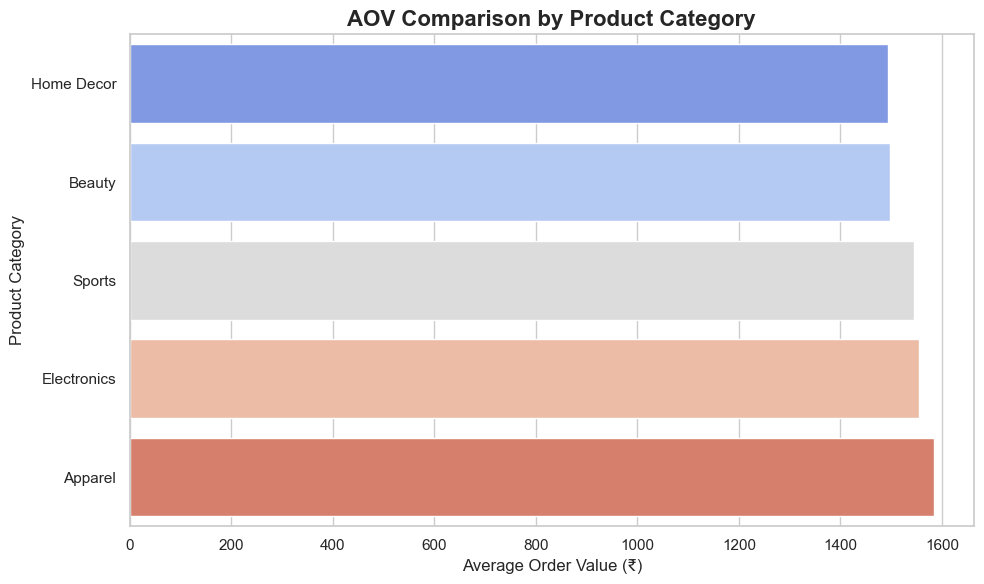

In [9]:
#3.What is the average order value (AOV) by product category?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         # e.g., '127.0.0.1'
    user='root',              # your MySQL username
    password='Janani@1997', # your MySQL password
    database='DB'   # your database name
)

# ---  Call Stored Procedure ---
query = "CALL GetAverageOrderValueByCategory();"
df_aov_category = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Average Order Value (AOV) by Product Category:")
print(df_aov_category)

# ---  Visualization 2: Horizontal Bar Chart (Sorted by AOV) ---
plt.figure(figsize=(10,6))
sns.barplot(data=df_aov_category.sort_values('AOV', ascending=True),
            x='AOV', y='Product_Category', palette='coolwarm')

plt.title("AOV Comparison by Product Category", fontsize=16, weight='bold')
plt.xlabel("Average Order Value (₹)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()

# ---  Close the Connection ---
conn.close()

C:\Users\janan\AppData\Local\Temp\ipykernel_12412\4283885554.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_qty_month = pd.read_sql(query, conn)


Total Quantity Sold by Month:
        Month  Total_Qty
0   September     1386.0
1     January     1378.0
2     October     1362.0
3    December     1346.0
4       March     1301.0
5      August     1272.0
6        July     1246.0
7    November     1241.0
8       April     1200.0
9    February     1177.0
10       June     1173.0
11        May     1112.0


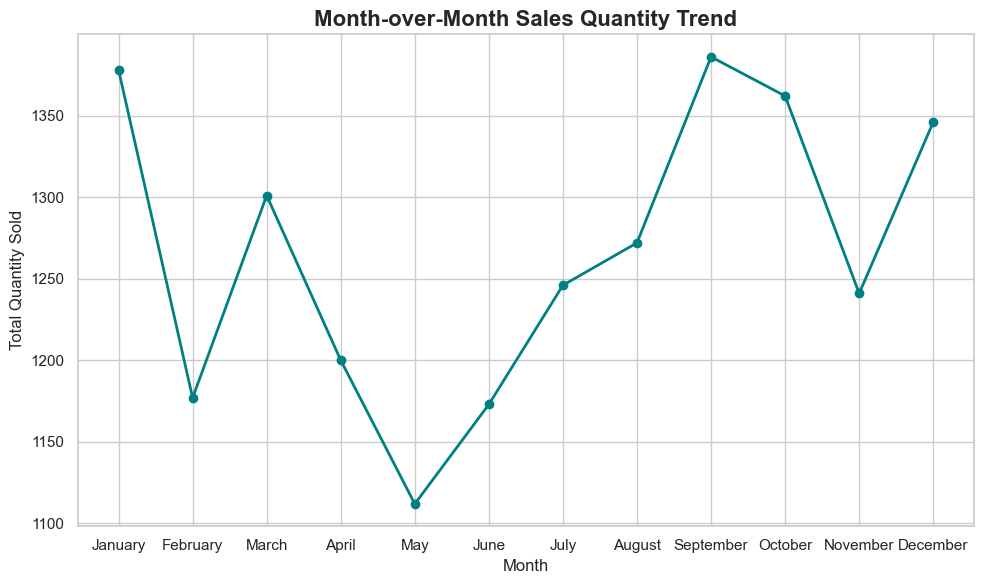

In [12]:
# 4.How does sales quantity trend month over month?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         # e.g., '127.0.0.1'
    user='root',              # your MySQL username
    password='Janani@1997', # your MySQL password
    database='DB'   # your database name
)

# ---  Call Stored Procedure ---
query = "CALL GetTotalQuantityByMonth();"
df_qty_month = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Total Quantity Sold by Month:")
print(df_qty_month)

# ---  Ensure Correct Month Order ---
# Optional: use a categorical order if months are not sorted chronologically
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
df_qty_month['Month'] = pd.Categorical(df_qty_month['Month'], categories=month_order, ordered=True)
df_qty_month = df_qty_month.sort_values('Month')

# ---  Visualization 1: Line Chart (Quantity Trend Over Months) ---
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(10,6))
plt.plot(df_qty_month['Month'], df_qty_month['Total_Qty'], marker='o', linewidth=2, color='teal')
plt.title("Month-over-Month Sales Quantity Trend", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ---  Close the Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_12412\2060995682.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_coupon_usage = pd.read_sql(query, conn)


✅ Percentage of Transactions Using Coupons: 49.60%


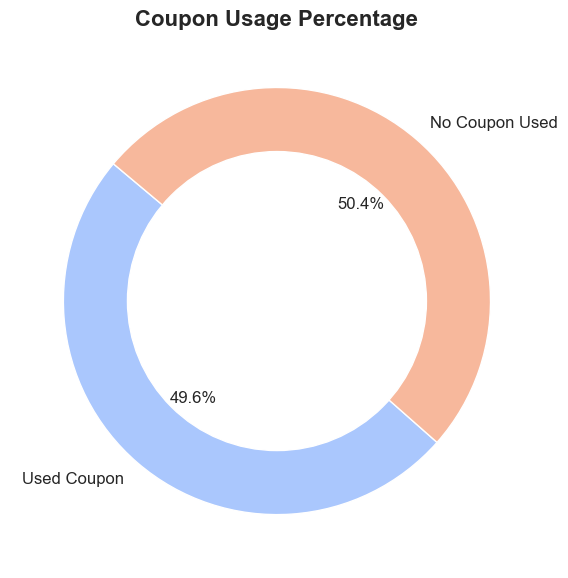

In [14]:
# 5.What percentage of transactions used coupons?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         # e.g., '127.0.0.1'
    user='root',              # your MySQL username
    password='Janani@1997', # your MySQL password
    database='DB'   # your database name
)

# ---  Call Stored Procedure ---
query = "CALL GetCouponUsagePercentage();"
df_coupon_usage = pd.read_sql(query, conn)

# ---  Extract the value ---
coupon_usage_percent = float(df_coupon_usage['CouponUsagePercent'][0])
no_coupon_percent = 100 - coupon_usage_percent

print(f"✅ Percentage of Transactions Using Coupons: {coupon_usage_percent:.2f}%")

# ---  Visualization: Donut Chart ---
labels = ['Used Coupon', 'No Coupon Used']
values = [coupon_usage_percent, no_coupon_percent]
colors = sns.color_palette("coolwarm", 2)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', 
                                   startangle=140, colors=colors, textprops={'fontsize':12})
# Create donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Coupon Usage Percentage", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close the Connection ---
conn.close()
